<a href="https://colab.research.google.com/github/MaidenTaief/Music_Final/blob/main/Copy_of_UserMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

print("Listing My Drive:")
drive_path = '/content/drive/My Drive'
print(os.listdir(drive_path))

try:
    shared_path = '/content/drive/Shared with me'
    print("\nListing Shared with me:")
    print(os.listdir(shared_path))
except Exception as e:
    print("\nError accessing 'Shared with me':", e)


In [4]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Reading the first CSV file and displaying the column names and first few rows
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned1.csv')
print("\nColumn Names of data_final_cleaned.csv:")
print(data_final_cleaned.columns)
print("\Sample of data_final_cleaned.csv:")
print(data_final_cleaned.sample(5))

# Reading the second CSV file and displaying the column names and first few rows
spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
print("\nColumn Names of spotify_dataset.csv:")
print(spotify_dataset.columns)
print("\nSample of spotify_dataset.csv:")
print(spotify_dataset.sample(5))



Column Names of data_final_cleaned.csv:
Index(['artists', 'name', 'popularity', 'year', 'cluster',
       'Cluster_Description', 'genres'],
      dtype='object')
\Sample of data_final_cleaned.csv:
                     artists  \
149499  The Neville Brothers   
31951             The Smiths   
121149       George Shearing   
55547              Lady Gaga   
132059         Marty Robbins   

                                                     name  popularity  year  \
149499                               With God On Our Side          40  1989   
31951   A Rush and a Push and the Land Is Ours - 2011 ...          54  1987   
121149                                Guilty - Remastered          51  2001   
55547                                     Marry The Night          53  2011   
132059                                           Big Iron          24  1976   

        cluster                   Cluster_Description  \
149499        3             Mellow / Vibrant / Joyful   
31951         1     

In [19]:
import pandas as pd

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load datasets
data_final = pd.read_csv(f'{dataset_path}/data_final_cleaned1.csv', usecols=['name', 'artists', 'cluster', 'Cluster_Description', 'popularity', 'year', 'genres'])
spotify_data = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_data.columns = spotify_data.columns.str.strip().str.replace('"', '')

# Display 'artists' from data_final and 'artistname' and 'trackname' from spotify_data
print(data_final[['artists', 'name']].head(30))  # Shows the first few rows of artists and name from data_final
print(spotify_data[['artistname', 'trackname']].sample(30))  # Shows the first few rows of artistname and trackname from spotify_data

                                              artists  \
0   Sergei Rachmaninoff, James Levine, Berliner Ph...   
1                                          Dennis Day   
2   KHP Kridhamardawa Karaton Ngayogyakarta Hadini...   
3                                        Frank Parker   
4                                          Phil Regan   
5   KHP Kridhamardawa Karaton Ngayogyakarta Hadini...   
6                                      John McCormack   
7                                 Sergei Rachmaninoff   
8                                     Ignacio Corsini   
9                                             Fortugé   
10                                  Maurice Chevalier   
11                                    Ignacio Corsini   
12                                            Georgel   
13                                    Mehmet Kemiksiz   
14                                         Zay Gatsby   
15                   Sergei Rachmaninoff, Ruth Laredo   
16                             

In [24]:
import pandas as pd

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load datasets
data_final = pd.read_csv(f'{dataset_path}/data_final_cleaned1.csv', usecols=['name', 'artists', 'cluster', 'Cluster_Description', 'popularity', 'year', 'genres'])
spotify_data = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_data.columns = spotify_data.columns.str.strip().str.replace('"', '')

# Normalize and clean the track and artist names for better matching
data_final['name_normalized'] = data_final['name'].str.lower().str.strip()
data_final['artists'] = data_final['artists'].str.lower().str.split(', ')
spotify_data['trackname_normalized'] = spotify_data['trackname'].str.lower().str.strip()
spotify_data['artistname'] = spotify_data['artistname'].str.lower().str.split(', ')

# Explode the artists lists into separate rows to facilitate more comprehensive matching
data_final_exploded = data_final.explode('artists')
spotify_data_exploded = spotify_data.explode('artistname')

# Merge datasets on both track and artist names for precise data integration
merged_data = pd.merge(spotify_data_exploded, data_final_exploded, left_on=['trackname_normalized', 'artistname'], right_on=['name_normalized', 'artists'], how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized','artists', 'name' ], inplace=True)

# Save the merged dataset
merged_data.to_csv(f'{dataset_path}/merged_data_precise.csv', index=False)

# Log details for verification
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")
print(merged_data.sample(10))
print(merged_data.info())
print(merged_data.describe())
print(merged_data.count())
print(merged_data.isnull().sum())

Number of rows in merged dataset: 4419267
Number of columns in merged dataset: 9
                                  user_id                 artistname  \
2405665  c48f64453d55d9071ea00f105fe5a231        5 seconds of summer   
2081573  cb8b96f68ca98e5c650e4a27bc6d34d5            michael jackson   
1044852  d8e59b2b9b7831fff08558125044eac3                the killers   
4418098  62d1aec61a035c396a9d78e5f800db72  ray noble & his orchestra   
417631   ad59a6c1cedf10afe9e6c2bcf1ff0ed1                   don omar   
1209268  fae163e4646520330bf2f294f714c32c               lana del rey   
2441872  58965fe80c55b878ab290bf36bb71206                the killers   
4293279  237b2bece8d5a4b11114a168f54b29f4                  thefatrat   
2334786  74d4033ef9db9f711816c3a7981513f2                  metallica   
2453390  6a84fc1511d2a79f951d7d22a7872861                 portishead   

                    trackname                   playlistname  popularity  \
2405665  She Looks So Perfect                    L

In [30]:
import pandas as pd

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load the cleaned dataset
cleaned_data = pd.read_csv(f'{dataset_path}/merged_data_precise.csv')

# Print initial data info
print("Initial data information:")
print(cleaned_data.info())

# Aggregate data to count unique plays per song per user
agg_data = cleaned_data.groupby(
    ['user_id', 'trackname', 'artistname', 'playlistname', 'cluster',
     'Cluster_Description', 'year', 'popularity', 'genres']
).size().reset_index(name='play_count')

# Validate that no key columns are missing
if agg_data.isnull().any().any():
    print("Warning: Missing values found in the aggregated data.")

# Save the aggregated data
agg_data_path = f'{dataset_path}/aggregated_data_full.csv'
agg_data.to_csv(agg_data_path, index=False)

# Print final dataset information and sample data
print("\nFully Aggregated Data Information:")
print(agg_data.info())

print("\nSample 20 records from the fully aggregated dataset:")
print(agg_data.sample(20))

print(f"\nThe aggregated dataset has been saved successfully to: {agg_data_path}")

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419267 entries, 0 to 4419266
Data columns (total 11 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   artistname           object
 2   trackname            object
 3   playlistname         object
 4   artists              object
 5   name                 object
 6   popularity           int64 
 7   year                 int64 
 8   cluster              int64 
 9   Cluster_Description  object
 10  genres               object
dtypes: int64(3), object(8)
memory usage: 370.9+ MB
None

Fully Aggregated Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408616 entries, 0 to 4408615
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              object
 1   trackname            object
 2   artistname           object
 3   playlistname         object
 4   cluster              in

Shape of the sparse song interaction matrix: (15201, 76861)
Non-zero elements in song matrix: 2831418
Density of the matrix: 0.002423403881129822


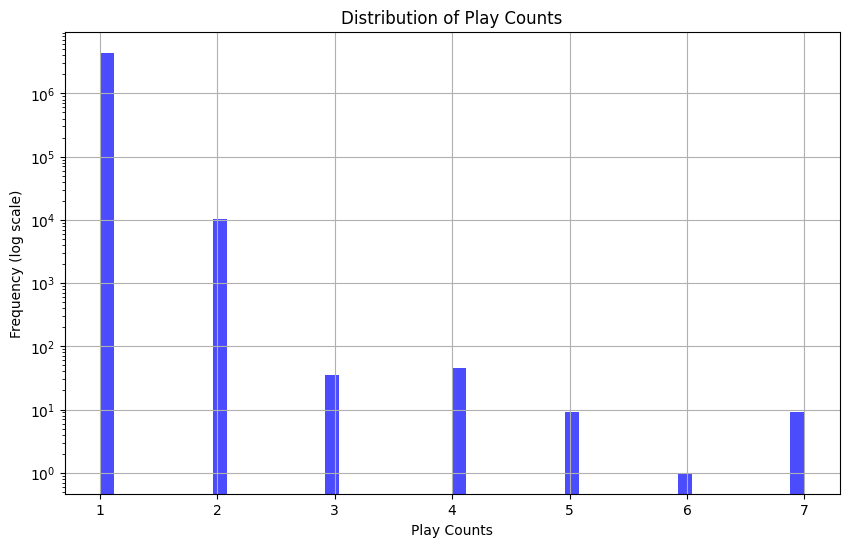

In [31]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz
import matplotlib.pyplot as plt

# Set the dataset directory path
dataset_path = '/content/drive/My Drive/DATASET'

# Load the aggregated data with the correct filename
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data_full.csv')

# Convert user IDs and track names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['trackname'] = pd.Categorical(agg_data['trackname'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['trackname'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as tracks
# shape parameters are derived from the number of categories in each feature
interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['trackname'].cat.categories.size))

# Save the sparse matrix for future use
sparse_matrix_path = f'{dataset_path}/sparse_song_matrix.npz'
save_npz(sparse_matrix_path, interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the sparse song interaction matrix:", interaction_matrix.shape)
print("Non-zero elements in song matrix:", interaction_matrix.nnz)
print("Density of the matrix:", interaction_matrix.nnz / (interaction_matrix.shape[0] * interaction_matrix.shape[1]))

# Plotting the distribution of play counts
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, log=True, color='blue', alpha=0.7)
plt.title('Distribution of Play Counts')
plt.xlabel('Play Counts')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

In [32]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz

# Load the data
dataset_path = '/content/drive/My Drive/DATASET'

# Load the aggregated data
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data_full.csv')

# Convert user IDs and playlist names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['playlistname'] = pd.Categorical(agg_data['playlistname'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['playlistname'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as playlists
# The shape parameters are derived from the number of categories in each feature
playlist_interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['playlistname'].cat.categories.size))

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/playlist_interaction_sparse_matrix.npz', playlist_interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the playlist interaction matrix:", playlist_interaction_matrix.shape)
print("Non-zero elements in playlist matrix:", playlist_interaction_matrix.nnz)
print("Density of the playlist matrix:", playlist_interaction_matrix.nnz / (playlist_interaction_matrix.shape[0] * playlist_interaction_matrix.shape[1]))


Shape of the playlist interaction matrix: (15201, 99153)
Non-zero elements in playlist matrix: 154834
Density of the playlist matrix: 0.00010272787763856476


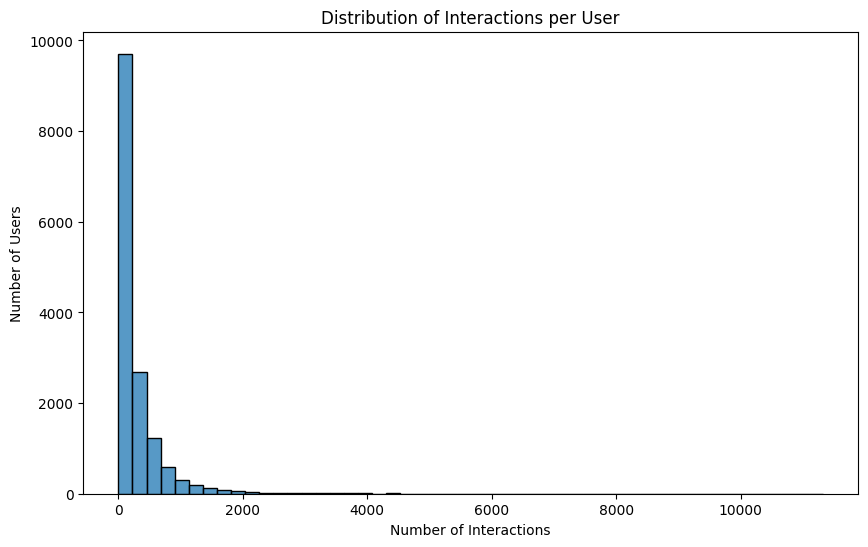

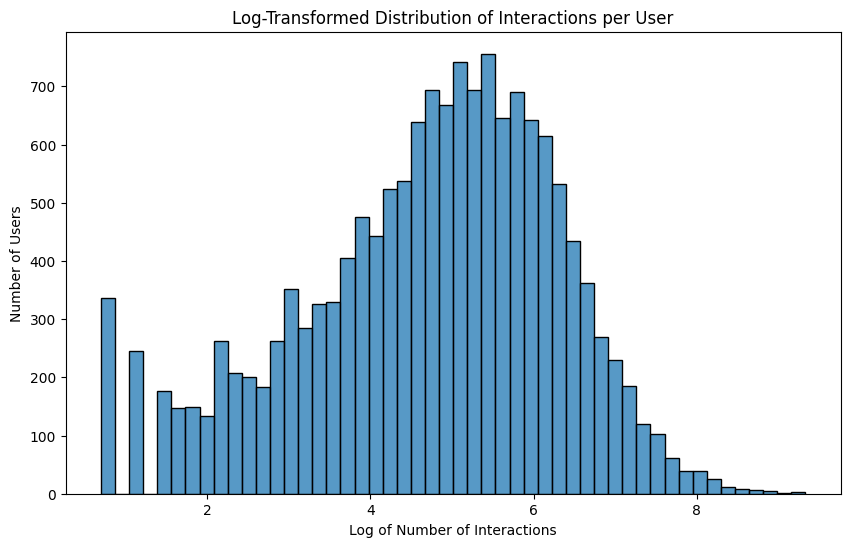

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_interactions = interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


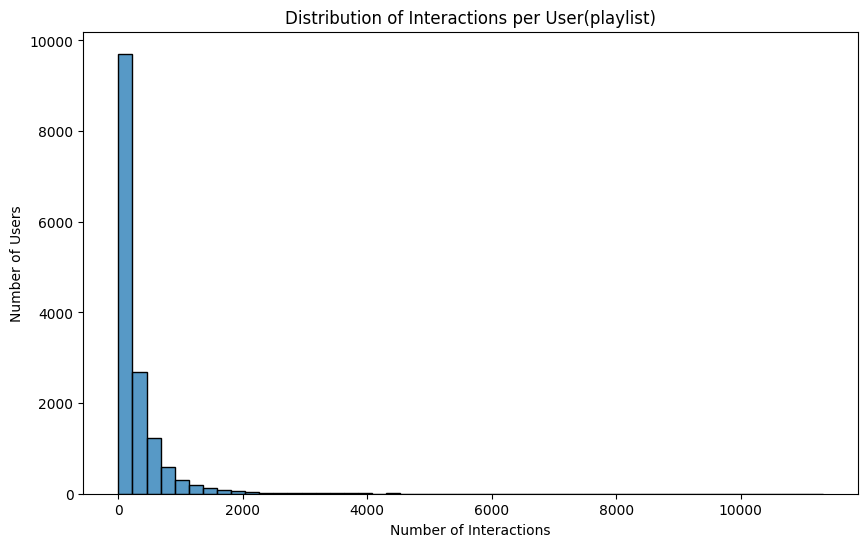

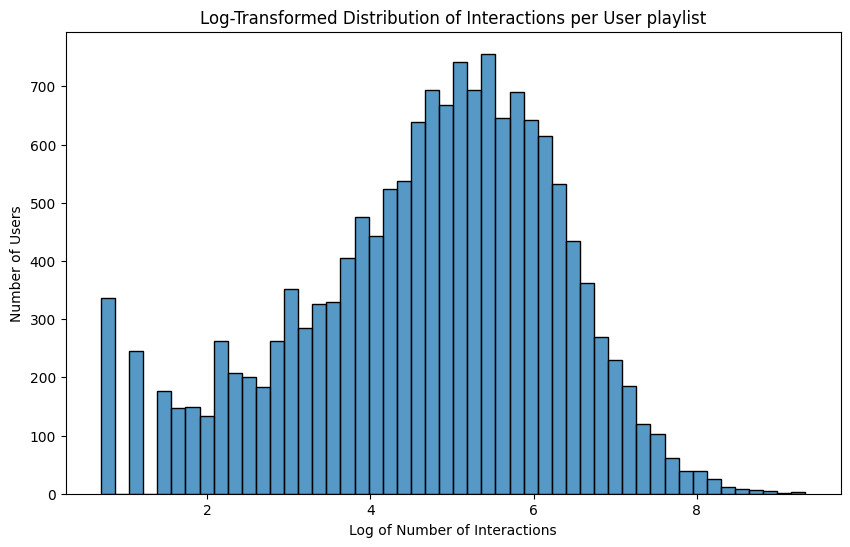

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_playlist_interactions = playlist_interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_playlist_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User(playlist)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_playlist_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User playlist')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


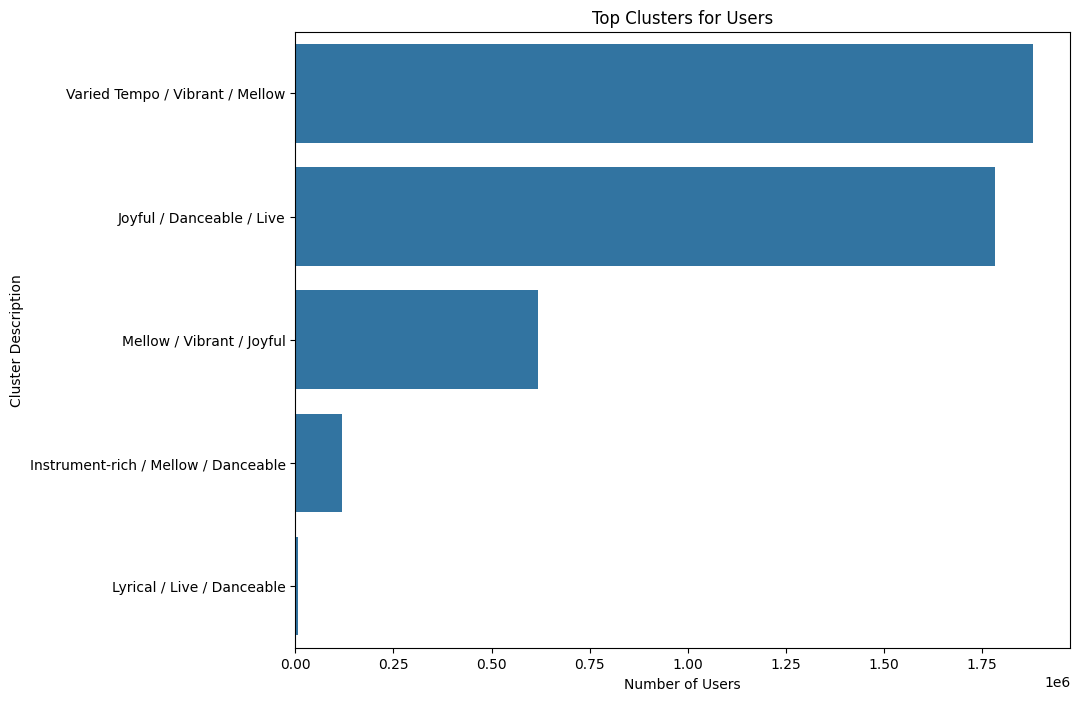

In [35]:
cluster_counts = agg_data['Cluster_Description'].value_counts().head(20)  # Show top 20 for brevity

plt.figure(figsize=(10, 8))
sns.barplot(x=cluster_counts.values, y=cluster_counts.index)
plt.title('Top Clusters for Users')
plt.xlabel('Number of Users')
plt.ylabel('Cluster Description')
plt.show()

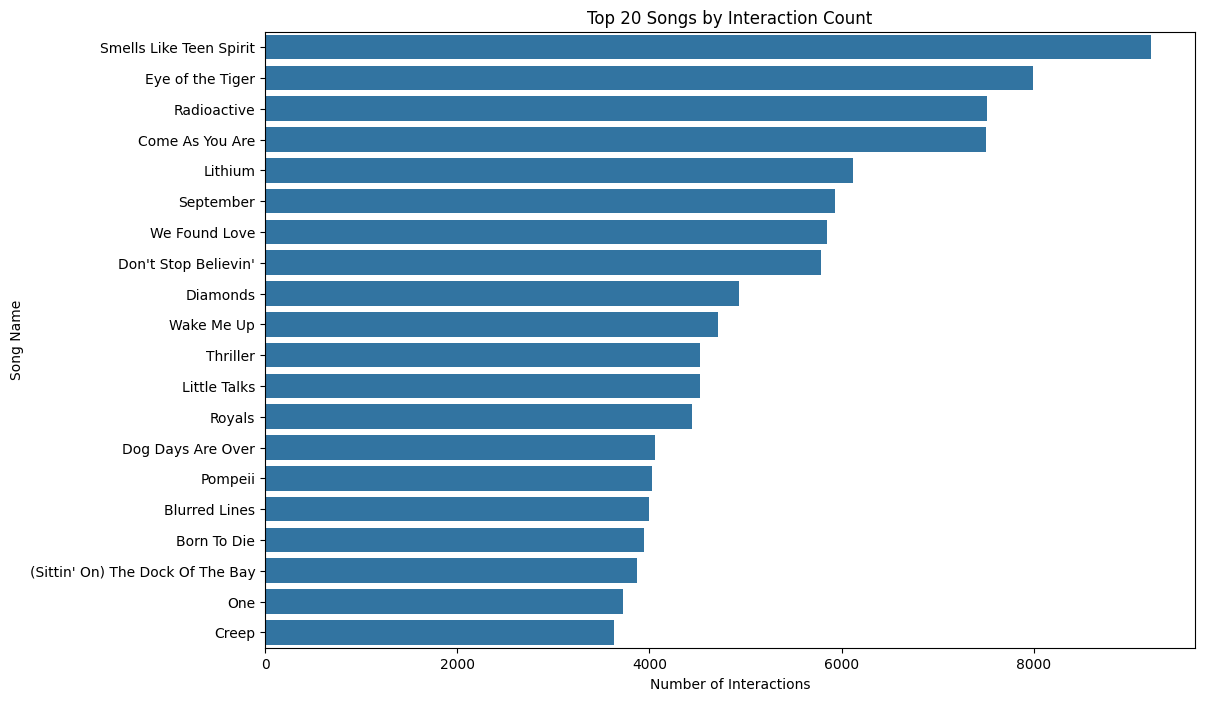

In [36]:
song_counts = agg_data.groupby('trackname')['play_count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=song_counts.values, y=song_counts.index)
plt.title('Top 20 Songs by Interaction Count')
plt.xlabel('Number of Interactions')
plt.ylabel('Song Name')
plt.show()

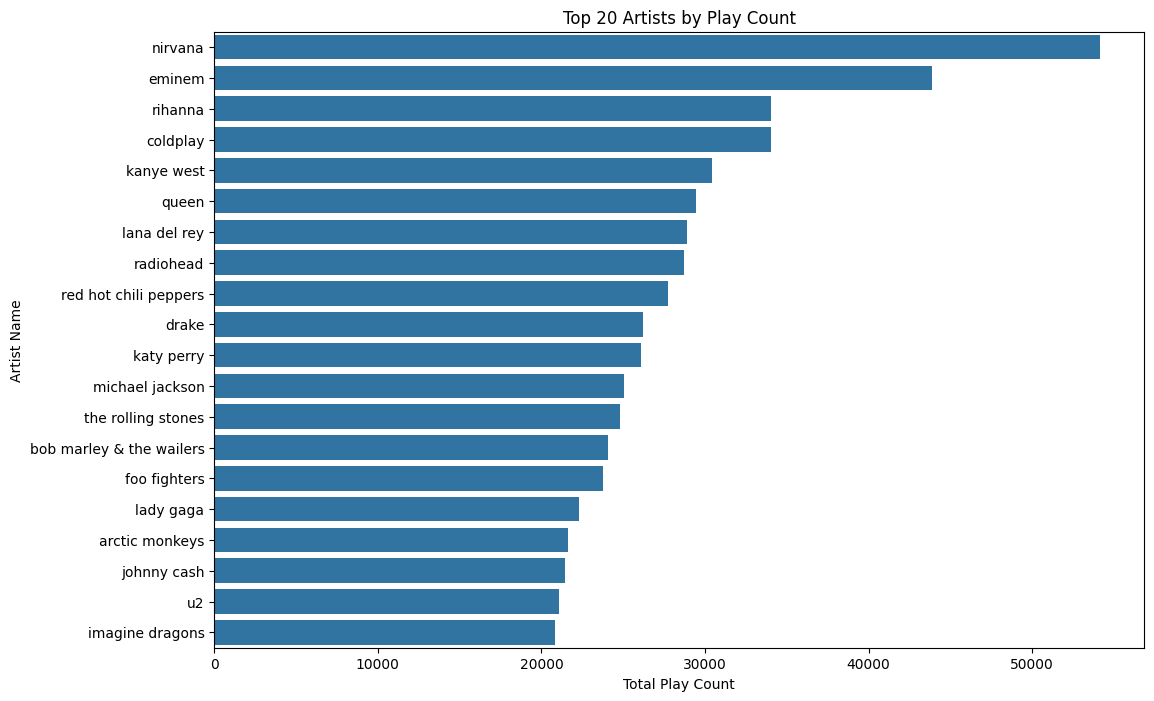

In [37]:
top_artists = agg_data.groupby('artistname')['play_count'].sum().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 20 Artists by Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Artist Name')
plt.show()


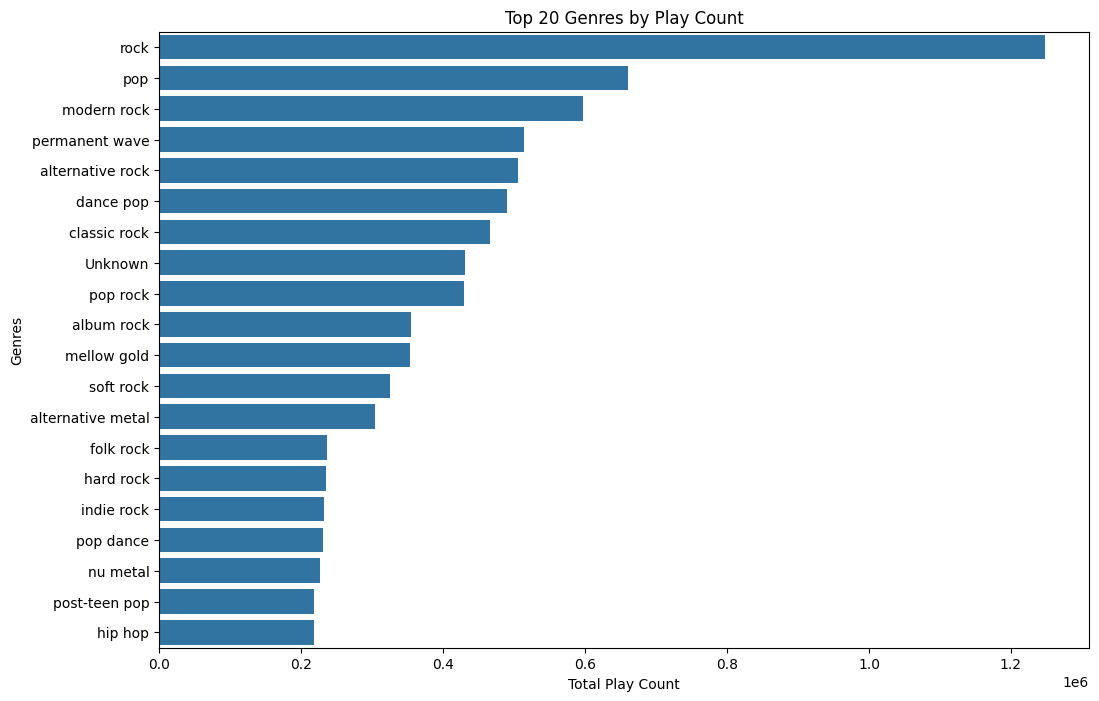

In [39]:
agg_data['split_genres'] = agg_data['genres'].str.split(' / ')
exploded_genres = agg_data.explode('split_genres')

# Aggregate the play counts for each genre
genre_play_counts = exploded_genres.groupby('split_genres')['play_count'].sum().nlargest(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_play_counts.values, y=genre_play_counts.index)
plt.title('Top 20 Genres by Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Genres')
plt.show()